In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("/home/ram_swe/Desktop/FFF/sales_data.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,Ewallet,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Credit card,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Ewallet,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,Ewallet,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,Ewallet,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,Cash,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,Cash,4.1


In [7]:
# Customer Summary

b1=df.loc[df["Branch"]=="A"]
b2=df.loc[df["Branch"]=="B"]
b3=df.loc[df["Branch"]=="C"]

# Total Customer
b1 #340  
b2 #332 
b3 #328 

# Male
b1.loc[b1["Gender"]=="Male"] # 179
b2.loc[b2["Gender"]=="Male"] # 170
b3.loc[b3["Gender"]=="Male"] # 150


# Female
b1.loc[b1["Gender"]=="Female"] #161
b2.loc[b2["Gender"]=="Female"] # 162
b3.loc[b3["Gender"]=="Female"] # 178

# Rating
overall_rate_A=b1["Rating"].sum()/340 
overall_rate_B=b2["Rating"].sum()/332
overall_rate_C=b3["Rating"].sum()/328

# Normal customers
bnc1=b1.loc[b1["Customer type"]=="Normal"]
bnc2=b2.loc[b2["Customer type"]=="Normal"]
bnc3=b3.loc[b3["Customer type"]=="Normal"]

# General customer
b1g=b1.loc[b1["Customer type"]=="Member"]
b2g=b2.loc[b2["Customer type"]=="Member"]
b3g=b3.loc[b3["Customer type"]=="Member"]




branch_summary=pd.DataFrame({"Branch":["A","B","C"],
          "Total_Customers":[340,332,328],
          "Male":[179,170,150],
          "Female":[161,162,178],
          "Normal_customers":[173,167,159],
          "Member_customer":[167,165,169],
          "Over_all_rate":[overall_rate_A,overall_rate_B,overall_rate_C]})

branch_summary=branch_summary.set_index("Branch")

branch_summary
want_2=int(input("Select 1.For Dataframe\n2.Visual Data:\t"))
if want_2==1:
    print(branch_summary)
elif want_2==2:
    pass

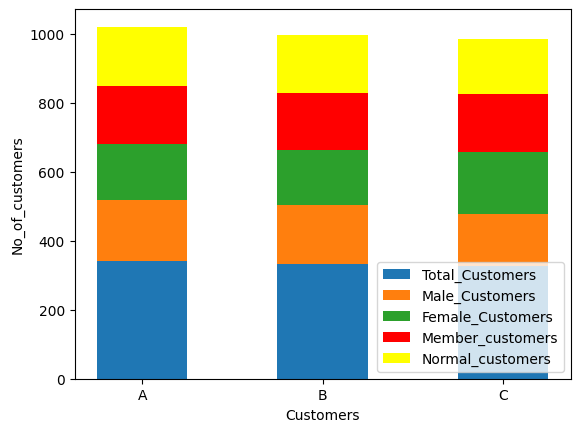

In [15]:
import matplotlib.pyplot as plt

x=np.array(["A","B","C"])
w=0.50

tc=branch_summary["Total_Customers"]
y=tc.values
#-----------------------------------------
tc1=branch_summary["Male"]
y1=tc1.values
#----------------------------------------
tc2=branch_summary["Female"]
y2=tc2.values
#--------------------------------------
tc3=branch_summary['Member_customer']
y3=tc3.values
#--------------------------------------

tc4=branch_summary['Normal_customers']
y4=tc4.values
#--------------------------------------

#plotting total_customers
plt.bar(x,y,width=w,label='Total_Customers')

#plotting male customers
plt.bar(x,y1,width=w,bottom=y,label="Male_Customers")

#plotting female customers
plt.bar(x,y2,width=w,bottom=[y[a]+y1[a]for a in range (len(x))],label="Female_Customers")

#plotting 
plt.bar(x,y3,width=w,bottom=[y[a]+y1[a]+y2[a]for a in range (len(x))],label='Member_customers',color='red')

plt.bar(x,y4,width=w,label="Normal_customers",bottom=[y[a]+y1[a]+y2[a]+y3[a]for a in range (len(x))],color='yellow')

plt.xlabel("Customers")
plt.ylabel("No_of_customers")
plt.legend(loc='lower right') 
plt.show()

